# Faster RCNN VGG16 + DCNv1 + FPN

**Источник:** Object Detector for Autonomous Vehicles Based on Improved Faster-RCNN URL: https://github.com/Ziruiwang409/improved-faster-rcnn

**Основа:** Faster RCNN, бэкбон: VGG16

**Улучшения:**

1. Деформируемые сверточные сети (DCNv1). Статья: Jifeng Dai, Haozhi Qi, Yuwen Xiong, Yi Li. Deformable Convolutional Networks URL: https://arxiv.org/abs/1703.06211
2. Сеть пирамидальных признаков (FPN). Статья: Tsung-Yi Lin, Piotr Dollár, Ross Girshick. Feature Pyramid Networks for Object Detection. URL: https://arxiv.org/abs/1612.03144

![architecture](https://github.com/Ziruiwang409/improved-faster-rcnn/blob/main/images/model_architecture.png?raw=true)

## Клонирование репозитория

In [1]:
base_dir="/content/improved-faster-rcnn/"
!git clone https://github.com/oaleksander/improved-faster-rcnn.git

Cloning into 'improved-faster-rcnn'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 390 (delta 195), reused 388 (delta 193), pack-reused 0 (from 0)
Receiving objects: 100% (390/390), 3.84 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [2]:
!cd $base_dir && git fetch && git reset --hard origin/main && git submodule update --init

HEAD is now at 2849f43 fix: proper argument passing
Submodule 'datasets/neu-det' (https://github.com/ljvblfz/neu-det-coco.git) registered for path 'datasets/neu-det'
Cloning into '/content/improved-faster-rcnn/datasets/neu-det'...
Submodule path 'datasets/neu-det': checked out '37b9420337348540b12764d084e47a604cd23a01'


## Установка зависимостей

In [3]:
!cd $base_dir && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=4569eeb183167ecbb18b65a536edffde50e11c06af0559e561cedb07d8f976e9
  Stored in directory: /root/.cache/pip/wheels/37/6c/38/64eeaa310e325aacda723e6df1f79ab5e9f31ba195264e04a8
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29727 sha256=ea3bde78c71733648649e759a928a40c9e86b04a309a117eccda1f101854567a
  Stored in directory: /root/.cache/pip/wheels/69/12/36/73a61a7ea788c74f258d51c041265c2a5c06dec6ec04ca847b
Successfully built visdom torchnet


## Обучение (Baseline VGG16)

In [4]:
!cd $base_dir && python3 ./train.py deformable= apply_fpn= epoch=13

False
False
13
=================== User config ===============
{'__dict__': {'apply_fpn': False, 'deformable': False, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
load neu-det data
load Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a

# Тест (Baseline VGG16)

In [5]:
!cd $base_dir && python3 ./test.py deformable= apply_fpn= epoch=13

False
False
13
=================== User config ===============
{'__dict__': {'apply_fpn': False, 'deformable': False, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
Load dataset
load Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weig

# Обучение (+FPN)

In [6]:
!cd $base_dir && python3 ./train.py deformable= apply_fpn=True epoch=13

False
True
13
=================== User config ===============
{'__dict__': {'apply_fpn': True, 'deformable': False, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
load neu-det data
load FPN Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than

# Тест (+FPN)

In [7]:
!cd $base_dir && python3 ./test.py deformable= apply_fpn=True epoch=13

False
True
13
=================== User config ===============
{'__dict__': {'apply_fpn': True, 'deformable': False, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
Load dataset
load FPN Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a we

#Обучение (+DCN1+FPN)

In [8]:
!cd $base_dir && python3 ./train.py deformable=True apply_fpn=True epoch=13

True
True
13
=================== User config ===============
{'__dict__': {'apply_fpn': True, 'deformable': True, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
load neu-det data
load Deformable FPN Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments o

#Тест (+DCN1+FPN)

In [9]:
!cd $base_dir && python3 ./test.py deformable=True apply_fpn=True epoch=13

True
True
13
=================== User config ===============
{'__dict__': {'apply_fpn': True, 'deformable': True, 'epoch': 13},
 '__doc__': None,
 '__module__': 'utils.config',
 '__weakref__': None,
 'apply_fpn': True,
 'data_dir': 'datasets/neu-det/NEU-DET/',
 'database': 'neu-det',
 'deformable': True,
 'epoch': 14,
 'epoch_decay': 9,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 200,
 'min_size': 200,
 'model': 'vgg16',
 'n_visual_imgs': 10,
 'nms_thresh': 0.5,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_dir': './exp',
 'score_thresh': 0.05,
 'test_num_workers': 8,
 'train_num_workers': 8,
 'weight_decay': 0.00025}
Load dataset
load Deformable FPN Faster RCNN Model
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other 

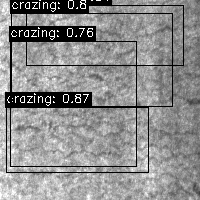

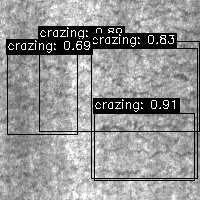

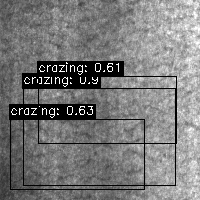

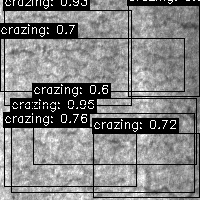

In [10]:
from IPython.display import Image, display
for i in range(4):
  display(Image(base_dir + f'exp/visuals/neu-det/fpn_frcnn_vgg16/{i}.jpg'))

In [11]:
from google.colab import drive
drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/fpn_frcnn_vgg16.pth'
load_dir = base_dir + 'exp/neu-det/fpn_frcnn_vgg16.pth'

ValueError: mount failed

Save dataset

In [ ]:
!cp $load_dir $save_dir

Load dataset

In [ ]:
!cp $save_dir $load_dir